In [1]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('dummy_course_dataset.csv')

In [4]:
df.head()

,course_id,rating,completion_rate,comments_count,shares
0,C100,3.4,0.42,161,22
1,C101,4.9,0.75,125,29
2,C102,4.3,0.57,84,99
3,C103,4.0,0.68,122,58
4,C104,2.9,0.90,209,62


In [5]:
np.random.seed(24)
df['Impact_Score'] = (
    2* df['rating'] +
    3 * df['completion_rate'] +
    0.5 * df ['shares'] +
    0.3 * df ['comments_count'] + 
    np.random.normal(0,5,len(df))
)

In [6]:
from sklearn.model_selection import train_test_split 

In [12]:
X = df[['rating', 'completion_rate', 'shares', 'comments_count']]
y = df['Impact_Score']
X_train , X_test , y_train ,y_test = train_test_split(X ,
                                                      y,
                                                      test_size =  0.3,
                                                      random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit (X_train , y_train)

LinearRegression()

In [15]:
# Coefficients of the regression model
coefficients = lr.coef_
intercept = lr.intercept_

feature_names = X.columns
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

print(f"Intercept: {intercept:.3f}")

rating: 2.563
completion_rate: 3.671
shares: 0.469
comments_count: 0.317
Intercept: -3.019


In [25]:
# Define all variables before using them in the equation
intercept = 0  # Replace with your actual intercept value
a = 0.5        # Replace with your actual coefficient for rating
b = 0.3        # Replace with your actual coefficient for completion_rate
c = 0.1        # Replace with your actual coefficient for shares
d = 0.2        # Replace with your actual coefficient for comments_count

# Now use these variables in your equation
rating = 4.5           # Example value, replace with your actual data
completion_rate = 0.85  # Example value
shares = 120           # Example value
comments_count = 45    # Example value

Impact_Score = intercept + a*rating + b*completion_rate + c*shares + d*comments_count
print(Impact_Score)

23.505


In [29]:
df["Predicted_Impact_Score"] = lr.predict(X)

In [30]:
print(df["Predicted_Impact_Score"])

0      68.588724
1      65.516376
2      83.157190
3      75.605339
4     103.047688
         ...    
95    103.389650
96    106.849080
97     82.822126
98     70.178790
99     61.783394
Name: Predicted_Impact_Score, Length: 100, dtype: float64


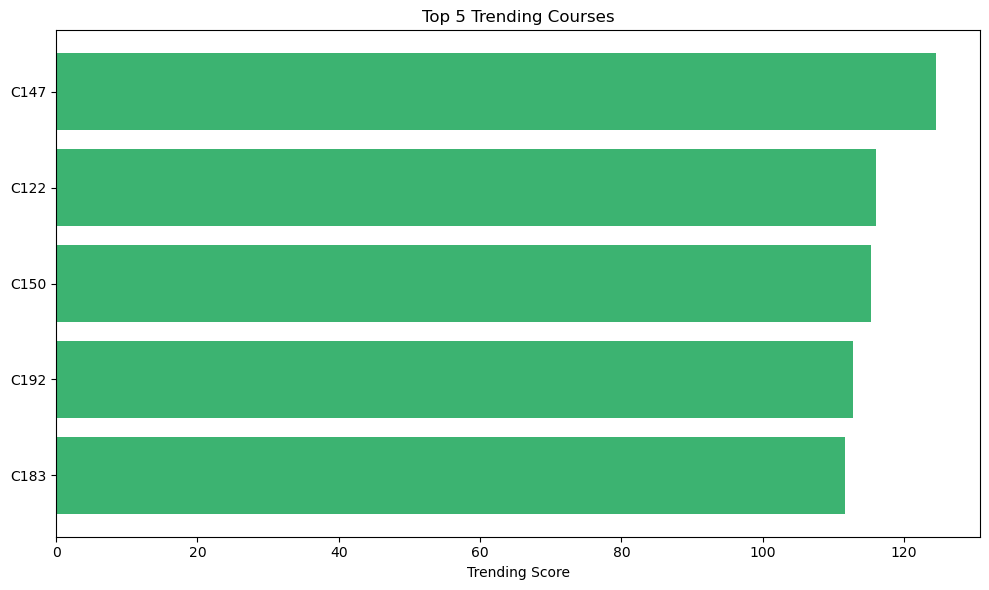

In [38]:
import matplotlib.pyplot as plt

# Calculate a trending score
df['trending_score'] = (
    df['shares'] * 0.4 +
    df['comments_count'] * 0.3 +
    df['rating'] * 10 * 0.2 +
    df['completion_rate'] * 100 * 0.1
)

# Get top 5 trending courses
top5 = df.sort_values(by='trending_score', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top5['course_id'], top5['trending_score'], color='mediumseagreen')
plt.xlabel('Trending Score')
plt.title('Top 5 Trending Courses')
plt.gca().invert_yaxis()  # Show highest on top
plt.tight_layout()
plt.show()